In [15]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_excel("../data/processed/cleaned.xlsx")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,united kingdom,83.4
1,489434,79323p,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom,81.0
2,489434,79323w,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom,81.0
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,united kingdom,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,united kingdom,30.0


In [16]:
# Use one day after the last invoice date as reference
import datetime

reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                      # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346,165,11,372.86
12347,3,2,1323.32
12348,74,1,222.16
12349,43,3,2671.14
12351,11,1,300.93


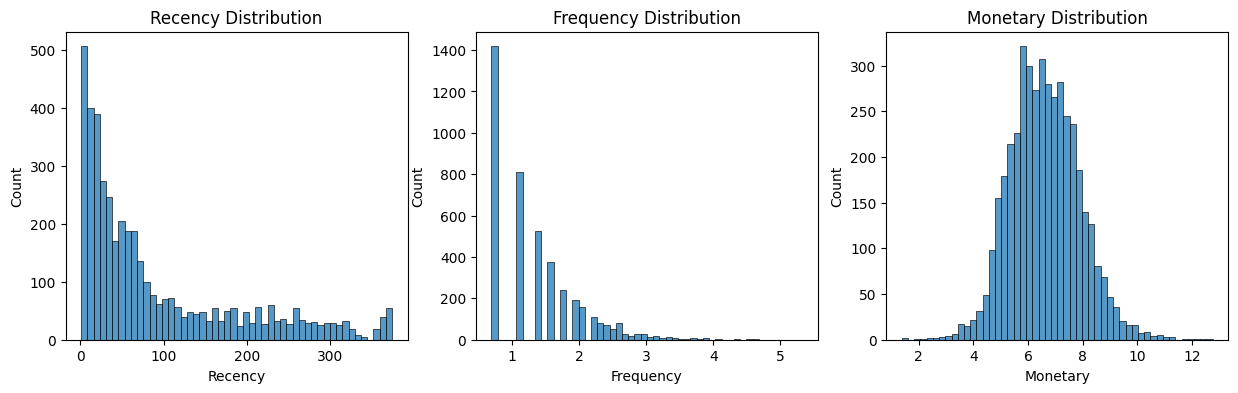

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=50)
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=50)
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=50)
plt.title('Monetary Distribution')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Remove extra spaces if any, and convert to numeric
rfm['Frequency'] = rfm['Frequency'].astype(str).str.strip()  # remove whitespace
rfm['Frequency'] = pd.to_numeric(rfm['Frequency'], errors='coerce')  # convert to number

# Check if any NaNs appeared
rfm['Frequency'].isnull().sum()



plt.show()


In [ ]:
rfm.head()
rfm.columns
rfm = rfm.reset_index()

rfm.to_excel("data/processed/rfm_table.xlsx", index=False)



Index(['Recency', 'Frequency', 'Monetary'], dtype='object')